In [0]:
!pip install -q keras

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 1000)

Using TensorFlow backend.


In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=1000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1
  return results


In [0]:

imdb_training = vectorize_sequences(train_data)
imdb_testing = vectorize_sequences(test_data)

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from collections import Counter
def parse_amazon_data(lines, common_set=None):
    '''
    :param lines: a list of string... each line being a review + label
    :return: a list of [review (string), label (int)]
    '''
    
    # iterate through lines, create list of labels & list of reviews
    
    lines = [line.lower() for line in lines if len(line) >10]
    reviews = [0 for i in range(len(lines))]
    labels = [0 for i in range(len(lines))]
    all_words = []
    
    data = [0 for i in range(len(lines))]
               
    
    for i in range(len(lines)):
      label, review_str = lines[i].split(" ", 1)
      review_str = ' '.join([word for word in review_str.split() if word not in stop])
      all_words += [word for word in review_str.split() if word not in stop]
      labels[i] = int(label[9])-1
      reviews[i] = review_str
    
    print("done")
    
#     count = Counter(word for line in reviews for word in line.split())
    if common_set is None:
      count = Counter(all_words)
      print("meow")

      # extract most common 10000 words

      common = [word for (word, count) in count.most_common(1000)]
      common_set = set(common)
      print("mooooo")
    
    i = 0
    for r in reviews:
      r_words = set(r.split())
      # find union between r_words and common --> find index
#       data[i] = [i for i in range(len(common)) if common[i] in r_words]
      intersect = r_words.intersection(common_set)
      data[i] = [common.index(w) for w in intersect]
      i += 1
      if i % 100000 == 0:
        print(i)
    
    print("whee")
     
    return data, labels, common_set

In [0]:
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

# amazon_training = "./data/train.ft.txt.bz2"
# amazon_testing = "./testfrom google.colab import drive
# drive.mount('/content/gdrive').ft.txt.bz2"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
amazon_training = "./data/train.ft.txt.bz2"
amazon_testing = "./data/test.ft.txt.bz2"

In [0]:
amazon_training_lines = ""
with open("gdrive/My Drive/data/train.ft.txt", 'r') as f:
  amazon_training_lines = f.readlines()

In [0]:
amazon_testing_lines = []

with open("gdrive/My Drive/data/test.ft.txt", 'r') as f:
  amazon_testing_lines = f.readlines()

In [0]:
print(len(amazon_training_lines))
print(len(amazon_testing_lines))

3600000
400000


In [0]:
amazon_test_data, amazon_test_labels, common_set = parse_amazon_data(amazon_testing_lines)



done
meow
mooooo
100000
200000
300000
400000
whee


In [0]:
amazon_training_data, amazon_training_labels, common_set = parse_amazon_data(amazon_training_lines[:400000])


done
meow
mooooo
100000
200000
300000
400000
whee


In [0]:
amazon_testing = vectorize_sequences(amazon_test_data)


In [0]:
amazon_training = vectorize_sequences(amazon_training_data)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
imdb_history = model.fit(imdb_training, train_labels, epochs=20, validation_data=(imdb_testing, test_labels), batch_size=512, shuffle=True)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 284us/step - loss: 0.5193 - acc: 0.7568 - val_loss: 0.4037 - val_acc: 0.8337
Epoch 2/20
25000/25000 [==============================] - 1s 24us/step - loss: 0.3657 - acc: 0.8472 - val_loss: 0.3491 - val_acc: 0.8544
Epoch 3/20
25000/25000 [==============================] - 1s 22us/step - loss: 0.3298 - acc: 0.8621 - val_loss: 0.3339 - val_acc: 0.8586
Epoch 4/20
25000/25000 [==============================] - 1s 22us/step - loss: 0.3173 - acc: 0.8672 - val_loss: 0.3374 - val_acc: 0.8564
Epoch 5/20
25000/25000 [==============================] - 1s 22us/step - loss: 0.3084 - acc: 0.8724 - val_loss: 0.3372 - val_acc: 0.8569
Epoch 6/20
25000/25000 [==============================] - 1s 22us/step - loss: 0.3062 - acc: 0.8730 - val_loss: 0.3295 - val_acc: 0.8590
Epoch 7/20
25000/25000 [==============================] - 1s 22us/step - loss: 0.3004 - acc: 0.8767 - val_loss: 0.3450 - val_ac

In [0]:
imdb_history1 = model.fit(imdb_training, train_labels, epochs=20, validation_data=(amazon_testing, amazon_test_labels), batch_size=512, shuffle=True)

Train on 25000 samples, validate on 400000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 129us/step - loss: 0.2443 - acc: 0.8991 - val_loss: 0.8515 - val_acc: 0.4782
Epoch 2/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.2378 - acc: 0.9036 - val_loss: 0.8607 - val_acc: 0.4791
Epoch 3/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.2336 - acc: 0.9038 - val_loss: 0.8727 - val_acc: 0.4776
Epoch 4/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.2282 - acc: 0.9068 - val_loss: 0.8887 - val_acc: 0.4766
Epoch 5/20
25000/25000 [==============================] - 3s 127us/step - loss: 0.2238 - acc: 0.9081 - val_loss: 0.8927 - val_acc: 0.4757
Epoch 6/20
25000/25000 [==============================] - 3s 127us/step - loss: 0.2174 - acc: 0.9125 - val_loss: 0.9079 - val_acc: 0.4760
Epoch 7/20
25000/25000 [==============================] - 3s 127us/step - loss: 0.2131 - acc: 0.9132 - val_loss: 0.9071 -

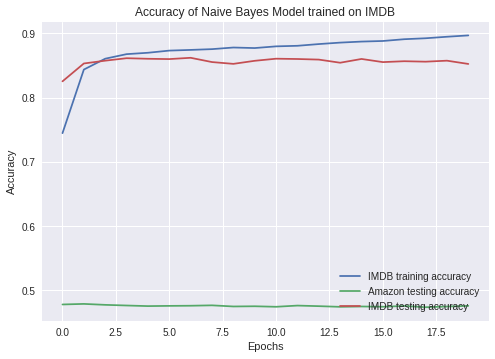

In [0]:
import matplotlib.pyplot as plt

x1 = np.array([i for i in range(20)])
plt.plot(x1, imdb_history.history['acc']) 
plt.plot(x1, imdb_history1.history['val_acc']) 
plt.plot(x1, imdb_history.history['val_acc']) 


plt.legend(['IMDB training accuracy', 'Amazon testing accuracy', 'IMDB testing accuracy'], loc='lower right')
plt.title('Accuracy of Naive Bayes Model trained on IMDB')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [0]:
amazon_history = model.fit(amazon_training, amazon_training_labels, epochs=20, validation_data=(imdb_testing, test_labels), batch_size=512, shuffle=True)
amazon_history1 = model.fit(amazon_training, train_labels, epochs=20, validation_data=(amazon_testing, amazon_test_labels), batch_size=512, shuffle=True)

Train on 400000 samples, validate on 25000 samples
Epoch 1/20
400000/400000 [==============================] - 6s 16us/step - loss: 0.4200 - acc: 0.8034 - val_loss: 1.4825 - val_acc: 0.4451
Epoch 2/20
400000/400000 [==============================] - 6s 16us/step - loss: 0.3722 - acc: 0.8325 - val_loss: 1.2824 - val_acc: 0.4498
Epoch 3/20
400000/400000 [==============================] - 6s 16us/step - loss: 0.3634 - acc: 0.8370 - val_loss: 1.2734 - val_acc: 0.4682
Epoch 4/20
400000/400000 [==============================] - 6s 16us/step - loss: 0.3566 - acc: 0.8410 - val_loss: 1.2761 - val_acc: 0.4667
Epoch 5/20
400000/400000 [==============================] - 6s 16us/step - loss: 0.3514 - acc: 0.8437 - val_loss: 1.2468 - val_acc: 0.4774
Epoch 6/20
400000/400000 [==============================] - 6s 16us/step - loss: 0.3475 - acc: 0.8463 - val_loss: 1.2495 - val_acc: 0.4879
Epoch 7/20
400000/400000 [==============================] - 6s 16us/step - loss: 0.3442 - acc: 0.8483 - val_loss: 1

ValueError: ignored

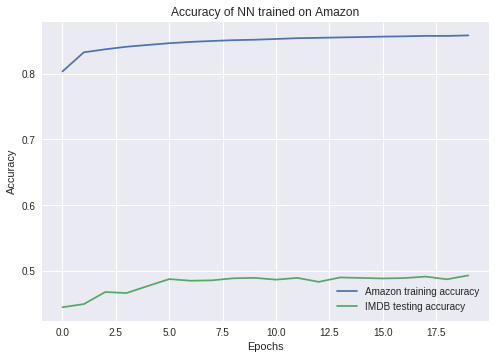

In [0]:
import matplotlib.pyplot as plt

x1 = np.array([i for i in range(20)])
plt.plot(x1, amazon_history.history['acc']) 
# plt.plot(x1, amazon_history1.history['val_acc']) 
plt.plot(x1, amazon_history.history['val_acc']) 


# plt.legend(['Amazon training accuracy', 'Amazon testing accuracy', 'IMDB testing accuracy'], loc='lower right')
plt.legend(['Amazon training accuracy', 'IMDB testing accuracy'], loc='lower right')
plt.title('Accuracy of NN trained on Amazon')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [0]:

plt.plot(imdb_training_acc)


METHOD #2 but not sure how we can use this if input length of training != input length of testing

In [0]:
amazon_training = "./train.ft.txt.bz2"
amazon_testing = "./test.ft.txt.bz2"
imdb_training = "./aclImdb/train"
imdb_testing = "./aclImdb/test"


In [0]:
amazon_training_file = bz2.BZ2File(amazon_training,'r')
amazon_training_lines = amazon_training_file.readlines()

In [0]:
def parse_amazon_data(lines):
    '''
    :param lines: a list of string... each line being a review + label
    :return: a list of [review (string), label (int)]
    '''
    review_and_ratings_list=[]
    for i in range(len(lines)):
        line_text = str(lines[i])
        label, review_str = line_text.split(" ", 1)
        label = int(label[-1]) - 1         # label with 1 and 0
        review_and_ratings_list.append([review_str, label])
    return review_and_ratings_list

In [0]:
def parse_imdb_data(file_path):
    '''
    :param lines: a list of string... each line being a review + label
    :return: a list of [review (string), label (int)]
    '''
    review_and_ratings_list=[]
    
    for folder_name in os.listdir(file_path):
      if folder_name == "pos" or folder_name == "neg":
        if folder_name == "pos":
          label = 1
        elif folder_name == "neg":
          label = 0
          
          
        for file_name in os.listdir(file_path + "/" + folder_name):
          with open(file_path + "/" + folder_name + "/" + file_name, 'r', errors='ignore') as f:
            review_and_ratings_list.append([f.read(), label])
    return review_and_ratings_list

In [0]:
def remove_punc(s):
    table = str.maketrans({key: None for key in string.punctuation})
    return s.translate(table)

In [0]:
def generate_x_and_y(review_and_ratings_list):
    data = pd.DataFrame(review_and_ratings_list, columns=['review','rating'])
    data['word_count'] = data['review'].str.lower().str.split().apply(len)
    data['review'] = data['review'].apply(remove_punc)
    data = data[:][data['word_count']<=25]
    
    stop_word = text.ENGLISH_STOP_WORDS
    count_vector = CountVectorizer(stop_words = stop_word, min_df=.0001, lowercase=1)
    x = csr_matrix(count_vector.fit_transform(data['review'].values)).todense()
    #y = csr_matrix(data['rating'].values).todense()
    y = data['rating'].values
    return (x, y)

In [0]:
#amazon_training_review_and_ratings_list = parse_amazon_data(amazon_training_lines)

imdb_testing_review_and_ratings_list = parse_imdb_data(imdb_testing)

In [0]:
#train_x, train_y = generate_x_and_y(amazon_training_review_and_ratings_list)
test_x, test_y = generate_x_and_y(imdb_testing_review_and_ratings_list)

In [0]:
import numpy as np

padded = np.pad(test_x, (0,9390)

(37, 288)

In [0]:
print(type(test_x))

<class 'numpy.matrixlib.defmatrix.matrix'>


In [0]:
model1=  Sequential()
model1.add(Dense(1000,input_shape=(9678,),activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model1.fit(train_x, train_y, epochs=6, batch_size=128, verbose=1)

In [0]:
model1.evaluate(test_x, test_y, batch_size=128)

In [0]:
def parse_amazon_data(lines):
    '''
    :param lines: a list of string... each line being a review + label
    :return: a list of [review (string), label (int)]
    '''
    review_and_ratings_list=[]
    for i in range(len(lines)):
        line_text = str(lines[i])
        label, review_str = line_text.split(" ", 1)
        label = int(label[-1]) - 1         # label with 1 and 0
        review_and_ratings_list.append([review_str, label])
    return review_and_ratings_list

In [0]:
amazon_testing_review_and_ratings_list = parse_amazon_data(amazon_testing_lines)


<zipfile.ZipFile [closed]>


In [0]:
model1.evaluate(X_test, y_test, batch_size=128)


NameError: ignored